# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Arliyandi
- **Email:** arlialya@gmail.com
- **ID Dicoding:** itsmatcha

## Menentukan Pertanyaan Bisnis

- Bagaimana faktor cuaca mempengaruhi jumlah penyewaan sepeda?
- Apakah musim tertentu menunjukkan tingkat penyewaan yang lebih tinggi atau rendah?

## Import Semua Packages/Library yang Digunakan

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Memuat Tabel Day**

In [228]:
dataynb = pd.read_csv("data/datasetsynb.csv")
dataynb.head()

,timestamp,nama,jenis_kelamin,no_hp,alamat,kota,info_kajian,status,usia,pendidikan_terakhir,hobi
0,26/11/2019 8:53:26,Herul nurjaman,Laki-Laki,081294466581,Sindang barang,Kota Bogor,WhatsApp,Belum Menikah,29,SMK,Olahraga
1,26/11/2019 8:54:35,Melly audina N,Perempuan,089667651308,MBR blok H7 No29 Bogor Timur,Kota Bogor,Instagram,Belum Menikah,20,SMA,-
2,26/11/2019 8:55:20,Annisa Hijrah Rahmaj,Perempuan,085882729009,Babakan Tengah Dramaga,Kabupaten Bogor,Instagram,Belum Menikah,21,SMA,-
3,26/11/2019 8:56:50,Mentari,Perempuan,081285878484,Cimanggu,Kota Bogor,Instagram,Belum Menikah,27,Sarjana,Baca buku
4,26/11/2019 8:56:58,Denny Saepullah (Aden),Laki-Laki,0895349128025,Kecamatan Dramaga Kampus IPB,Kabupaten Bogor,WhatsApp,Belum Menikah,21,SMK,Olahraga


**Insight:**

### Assessing Data

In [229]:
dataynb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   timestamp            2186 non-null   object
 1   nama                 2186 non-null   object
 2   jenis_kelamin        1611 non-null   object
 3   no_hp                2186 non-null   object
 4   alamat               2186 non-null   object
 5   kota                 2186 non-null   object
 6   info_kajian          2057 non-null   object
 7   status               456 non-null    object
 8   usia                 1700 non-null   object
 9   pendidikan_terakhir  1428 non-null   object
 10  hobi                 1908 non-null   object
dtypes: object(11)
memory usage: 188.0+ KB


In [230]:
dataynb.describe()

,timestamp,nama,jenis_kelamin,no_hp,alamat,kota,info_kajian,status,usia,pendidikan_terakhir,hobi
count,2186,2186,1611,2186,2186,2186,2057,456,1700,1428,1908
unique,2169,1688,3,1604,1774,73,38,4,43,50,674
top,27/11/2019 12:50:46,Elin Erlina,Perempuan,087870772994,Bogor,Kabupaten Bogor,Instagram,Belum Menikah,23,Sarjana,Membaca
freq,2,8,1213,8,56,1013,1215,410,158,496,214


In [231]:
dataynb[["timestamp", "jenis_kelamin","kota","info_kajian","status","usia","pendidikan_terakhir","hobi"]].describe()

,timestamp,jenis_kelamin,kota,info_kajian,status,usia,pendidikan_terakhir,hobi
count,2186,1611,2186,2057,456,1700,1428,1908
unique,2169,3,73,38,4,43,50,674
top,27/11/2019 12:50:46,Perempuan,Kabupaten Bogor,Instagram,Belum Menikah,23,Sarjana,Membaca
freq,2,1213,1013,1215,410,158,496,214


In [232]:
dataynb["jenis_kelamin"].unique()

array(['Laki-Laki', 'Perempuan', 'Laki Laki', nan], dtype=object)

**Insight:**
- Secara umum, tidak terdapat keanehan data pada kedua tabel tersebut. Jumlah entry dan count setiap kolom sama, dan juga tipe data yang digunakan. Namun perlu sedikit perbaikan pada tipe data dteday yang bersifat object seharusnya datetime
- Pada tabel Day, terdapat keanehan pada data minimal di kolom humidity, karena tidak seharusnya humidity bernilai 0
- Pada tabel hour, ada beberapa keanehan yang serupa, humidity bernilai 0, windspeed 0

### Cleaning Data

**MEMBERSIHKAN DATA TABEL DAY**

- **Memperbaiki Kesalahan Tipe Data**

In [233]:
dataynb['timestamp'] = pd.to_datetime(dataynb['timestamp']).dt.date 

C:\Users\Vrooh\AppData\Local\Temp\ipykernel_13204\2204352687.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataynb['timestamp'] = pd.to_datetime(dataynb['timestamp']).dt.date


In [234]:
# Fungsi untuk mengonversi ke format yang diinginkan  
def format_interval(timestamp):  
    if timestamp.month in [1, 2, 3, 4, 5, 6]:  
        return f"Jan-Jun {timestamp.year}"  
    else:  
        return f"Jul-Dec {timestamp.year}"  
  
# Membuat kolom baru untuk interval 6 bulan  
dataynb['timestamp_interval'] = dataynb['timestamp'].apply(format_interval)  
  
# Melihat hasil  
dataynb['timestamp_interval'].unique()

array(['Jul-Dec 2019', 'Jan-Jun 2020', 'Jul-Dec 2021', 'Jan-Jun 2022',
       'Jul-Dec 2022', 'Jan-Jun 2023', 'Jan-Jun 2024', 'Jul-Dec 2023',
       'Jul-Dec 2024'], dtype=object)

In [235]:
dataynb['jenis_kelamin'] = dataynb['jenis_kelamin'].replace({'Laki Laki': 'Laki-Laki'})  
dataynb['jenis_kelamin'] = dataynb['jenis_kelamin'].where(dataynb['jenis_kelamin'].isin(['Laki-Laki', 'Perempuan']), 'Undefined')

In [236]:
dataynb['kota'] = dataynb['kota'].where(dataynb['kota'].isin(['Kota Bogor', 'Kabupaten Bogor']), 'Other')

In [237]:
dataynb['info_kajian'].value_counts()

info_kajian
Instagram                                                                                  1215
Teman                                                                                       361
WhatsApp                                                                                    274
Instagram Yukngaji                                                                          107
Whatsapp                                                                                     36
Telegram                                                                                     18
Istri                                                                                         6
Suami                                                                                         3
Saudara                                                                                       3
Orang Dalem                                                                                   2
Kakak                       

In [238]:
dataynb['info_kajian'] = dataynb['info_kajian'].replace({'Instagram Yukngaji': 'Instagram', 'Whatsapp' : 'WhatsApp'}) 
dataynb['info_kajian'] = dataynb['info_kajian'].where(dataynb['info_kajian'].isin(['Instagram', 'Teman', 'WhatsApp','Telegram']), 'Other')
dataynb['info_kajian'].value_counts()

info_kajian
Instagram    1322
Teman         361
WhatsApp      310
Other         175
Telegram       18
Name: count, dtype: int64

In [239]:
def categorize_age(age):  
    if pd.isna(age) or age == '-' or age == '.':  
        return 'Undefined'  
    age = int(age)  
    if 13 <= age <= 19:  
        return '13-19'  
    elif 20 <= age <= 24:  
        return '20-24'  
    elif 25 <= age <= 29:  
        return '25-29'  
    elif 30 <= age <= 39:  
        return '30-39'  
    elif 40 <= age <= 49:  
        return '40-49'  
    elif age >= 50:  
        return '50+'  
    else:  
        return 'Undefined'  
  
# Menerapkan fungsi untuk mengelompokkan usia  
dataynb['rentang_usia'] = dataynb['usia'].apply(categorize_age)
dataynb['rentang_usia'].value_counts()

rentang_usia
20-24        751
25-29        516
Undefined    494
13-19        251
30-39        159
40-49         15
Name: count, dtype: int64

In [240]:
# Menghitung frekuensi hobi  
hobi_counts = dataynb['hobi'].value_counts()  
  
# Mengambil 6 hobi teratas  
top_hobbies = hobi_counts.nlargest(6).index.tolist()  # Mengubah ke list  
  
# Membuat kolom baru untuk hobi yang dicacah  
def count_hobbies(hobby):  
    if pd.isna(hobby):  # Memeriksa apakah nilai adalah NaN  
        return None  # Kembalikan None untuk nilai NaN  
      
    # Pisahkan hobi yang memiliki beberapa aktivitas  
    hobbies_split = [h.strip() for h in hobby.split(',')]  
    return hobbies_split  # Kembalikan daftar hobi yang dipecah  
  
# Menerapkan fungsi untuk mencacah hobi  
dataynb['split_hobbies'] = dataynb['hobi'].apply(count_hobbies)  
  
# Menghitung frekuensi dari semua hobi yang dicacah  
all_hobbies = dataynb['split_hobbies'].explode().value_counts()  
# Melihat hasil
print(all_hobbies)

split_hobbies
Membaca                   497
Travelling                421
Hangout                   307
Olahraga                  283
Photography               165
                         ... 
Menulis dan membaca.        1
Baca dan menonton film      1
Ikutan kajian               1
Wacthing movies             1
Jualan                      1
Name: count, Length: 504, dtype: int64


In [241]:
# Misalkan top_hobbies adalah daftar enam hobi teratas  
top_hobbies = ['Membaca', 'Travelling', 'Hangout', 'Olahraga', 'Traveling', 'Masak']  
  
# Mengelompokkan hobi yang tidak termasuk dalam 6 teratas ke dalam kategori 'Other'      
def categorize_hobby(hobby):      
    if hobby in top_hobbies:      
        return hobby      
    else:      
        return 'Other'      
      
# Menerapkan fungsi untuk mengelompokkan hobi      
dataynb['hobby_category'] = dataynb['split_hobbies'].apply(lambda x: [categorize_hobby(h) for h in x] if isinstance(x, list) else [])  
  
# Menggabungkan semua list menjadi satu list  
all_hobbies = dataynb['hobby_category'].sum()  
  
# Membuat DataFrame dari hasil  
list_category = pd.Series(all_hobbies).value_counts().reset_index()  
list_category.columns = ['hobby_category', 'count']  
  
# Menyaring hanya enam kategori teratas dan 'Other'  
list_category = list_category[list_category['hobby_category'].isin(top_hobbies) | (list_category['hobby_category'] == 'Other')]  
  
# Memastikan hanya ada 7 kategori unik  
if len(list_category['hobby_category'].unique()) > 7:  
    raise ValueError("Terdapat lebih dari 7 kategori unik dalam hobby_category.")  
  
# Memperbarui kolom hobby_category di DataFrame dataynb  
dataynb['hobby_category'] = dataynb['hobby_category'].apply(lambda x: [categorize_hobby(h) for h in x] if isinstance(x, list) else [])  
  
# Mengubah kolom hobby_category menjadi string untuk menghindari list  
dataynb['hobby_category'] = dataynb['hobby_category'].apply(lambda x: x[0] if x else 'Other')
dataynb['hobby_category'].value_counts()

hobby_category
Other         1159
Travelling     382
Membaca        308
Olahraga       151
Hangout        107
Traveling       42
Masak           37
Name: count, dtype: int64

In [242]:
valid_statuses = ['Belum Menikah', 'Menikah', 'Janda', 'Duda']  
  
# Fungsi untuk mengelompokkan status  
def categorize_status(status):  
    if status in valid_statuses:  
        return status  
    else:  
        return 'Undefined'  
  
# Menerapkan fungsi untuk mengelompokkan status  
dataynb['status'] = dataynb['status'].apply(categorize_status)  
dataynb['status'].value_counts()

status
Undefined        1730
Belum Menikah     410
Menikah            37
Janda               7
Duda                2
Name: count, dtype: int64

In [243]:
dataynb['pendidikan_terakhir'] = dataynb['pendidikan_terakhir'].replace({'SMK': 'SMA'})
dataynb['pendidikan_terakhir'] = dataynb['pendidikan_terakhir'].replace({'SMA': 'SMA/Sederajat'}) 
dataynb['pendidikan_terakhir'] = dataynb['pendidikan_terakhir'].where(dataynb['pendidikan_terakhir'].isin(['Sarjana', 'SMA/Sederajat', 'SMP/Sederajat','Diploma']), 'Other')
dataynb['pendidikan_terakhir'].value_counts()

pendidikan_terakhir
Other            814
SMA/Sederajat    672
Sarjana          496
Diploma          169
SMP/Sederajat     35
Name: count, dtype: int64

In [244]:
dataynb.describe()

,timestamp,nama,jenis_kelamin,no_hp,alamat,kota,info_kajian,status,usia,pendidikan_terakhir,hobi,timestamp_interval,rentang_usia,split_hobbies,hobby_category
count,2186,2186,2186,2186,2186,2186,2186,2186,1700,2186,1908,2186,2186,1908,2186
unique,130,1688,3,1604,1774,3,5,5,43,5,674,9,6,638,7
top,2019-12-09,Elin Erlina,Perempuan,087870772994,Bogor,Kabupaten Bogor,Instagram,Undefined,23,Other,Membaca,Jul-Dec 2023,20-24,[Membaca],Other
freq,148,8,1213,8,56,1013,1322,1730,158,814,214,391,751,227,1159


In [245]:
dataynb[['jenis_kelamin','kota', 'info_kajian', 'status', 'rentang_usia', 'timestamp_interval', 'hobby_category']].describe()

,jenis_kelamin,kota,info_kajian,status,rentang_usia,timestamp_interval,hobby_category
count,2186,2186,2186,2186,2186,2186,2186
unique,3,3,5,5,6,9,7
top,Perempuan,Kabupaten Bogor,Instagram,Undefined,20-24,Jul-Dec 2023,Other
freq,1213,1013,1322,1730,751,391,1159


## Exploratory Data Analysis (EDA)

### Explore Data Agregasi Harian "day_df"

In [246]:
dataynb.describe(include="all")

,timestamp,nama,jenis_kelamin,no_hp,alamat,kota,info_kajian,status,usia,pendidikan_terakhir,hobi,timestamp_interval,rentang_usia,split_hobbies,hobby_category
count,2186,2186,2186,2186,2186,2186,2186,2186,1700,2186,1908,2186,2186,1908,2186
unique,130,1688,3,1604,1774,3,5,5,43,5,674,9,6,638,7
top,2019-12-09,Elin Erlina,Perempuan,087870772994,Bogor,Kabupaten Bogor,Instagram,Undefined,23,Other,Membaca,Jul-Dec 2023,20-24,[Membaca],Other
freq,148,8,1213,8,56,1013,1322,1730,158,814,214,391,751,227,1159


In [247]:
dataynb['hobby_category'].value_counts()

hobby_category
Other         1159
Travelling     382
Membaca        308
Olahraga       151
Hangout        107
Traveling       42
Masak           37
Name: count, dtype: int64

In [248]:
dataynb[['jenis_kelamin','kota', 'info_kajian', 'status', 'rentang_usia', 'timestamp_interval', 'pendidikan_terakhir', 'hobby_category']].describe()

,jenis_kelamin,kota,info_kajian,status,rentang_usia,timestamp_interval,pendidikan_terakhir,hobby_category
count,2186,2186,2186,2186,2186,2186,2186,2186
unique,3,3,5,5,6,9,5,7
top,Perempuan,Kabupaten Bogor,Instagram,Undefined,20-24,Jul-Dec 2023,Other,Other
freq,1213,1013,1322,1730,751,391,814,1159


*Dari Data diatas Dapat kita perhatikan Cuaca Sangat memengaruhi jumlah penyewaan rental sepeda. Ketika cuaca "Clear", jumlah penyewaan lebih banyak. Sebaliknya, ketika sedang badai jumlah penyewaan menurun sangat drastis*

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana faktor cuaca mempengaruhi jumlah penyewaan sepeda?

Dikarenakan pada tahap EDA saya sudah membuat DataFrame baru, maka pada tahap Visualisasi ini saya cukup memanggil dataframe yang sama

In [249]:
sns.set(style="whitegrid")
# Fungsi untuk menampilkan persentase dan jumlah di atas bar  
def add_value_labels(ax):  
    for p in ax.patches:  
        ax.annotate(f'{p.get_height():.0f}',   
                    (p.get_x() + p.get_width() / 2., p.get_height()),   
                    ha='center', va='bottom') 

C:\Users\Vrooh\AppData\Local\Temp\ipykernel_13204\2305454406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dataynb[dataynb['jenis_kelamin'] != 'Undefined'], x='jenis_kelamin', palette='pastel')


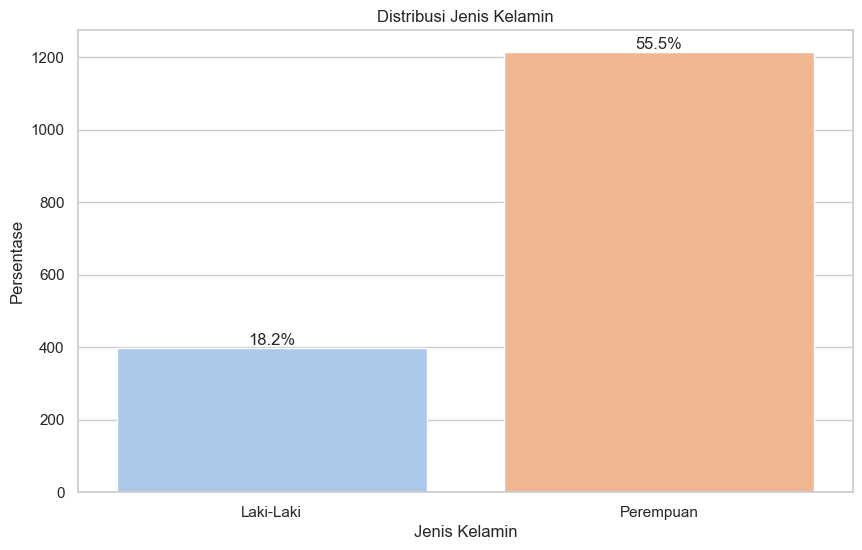

In [250]:
# a. Jenis Kelamin  
plt.figure(figsize=(10, 6))  
ax = sns.countplot(data=dataynb[dataynb['jenis_kelamin'] != 'Undefined'], x='jenis_kelamin', palette='pastel')  
plt.title('Distribusi Jenis Kelamin')  
plt.xlabel('Jenis Kelamin')  
plt.ylabel('Persentase')  
# Menghitung persentase  
total = len(dataynb[dataynb['jenis_kelamin'] != 'undefined'])  
for p in ax.patches:  
    percentage = f'{100 * p.get_height() / total:.1f}%'  
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')  
plt.show() 

C:\Users\Vrooh\AppData\Local\Temp\ipykernel_13204\1036986326.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dataynb[dataynb['kota'] != 'undefined'], x='kota', palette='pastel')


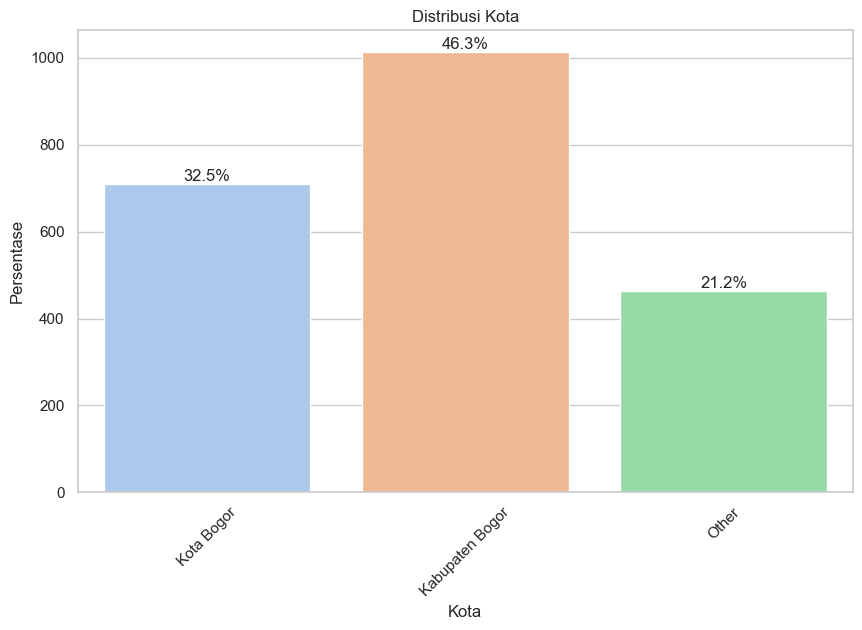

In [251]:
# b. Kota  
plt.figure(figsize=(10, 6))  
ax = sns.countplot(data=dataynb[dataynb['kota'] != 'undefined'], x='kota', palette='pastel')  
plt.title('Distribusi Kota')  
plt.xlabel('Kota')  
plt.ylabel('Persentase')  
total = len(dataynb[dataynb['kota'] != 'undefined'])  
for p in ax.patches:  
    percentage = f'{100 * p.get_height() / total:.1f}%'  
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')  
plt.xticks(rotation=45)  
plt.show()  

C:\Users\Vrooh\AppData\Local\Temp\ipykernel_13204\3602804926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dataynb[dataynb['info_kajian'] != 'Other'], x='info_kajian', palette='pastel')


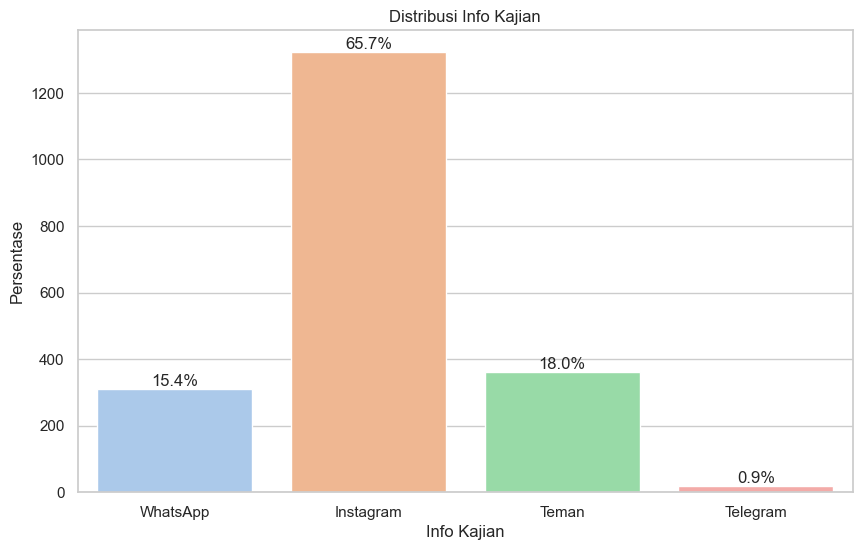

In [252]:
plt.figure(figsize=(10, 6))  
ax = sns.countplot(data=dataynb[dataynb['info_kajian'] != 'Other'], x='info_kajian', palette='pastel')  
plt.title('Distribusi Info Kajian')  
plt.xlabel('Info Kajian')  
plt.ylabel('Persentase')  
total = len(dataynb[dataynb['info_kajian'] != 'Other'])  
for p in ax.patches:  
    percentage = f'{100 * p.get_height() / total:.1f}%'  
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')  
plt.show()  

C:\Users\Vrooh\AppData\Local\Temp\ipykernel_13204\1077490884.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dataynb[dataynb['status'] != 'Undefined'], x='status', palette='pastel')


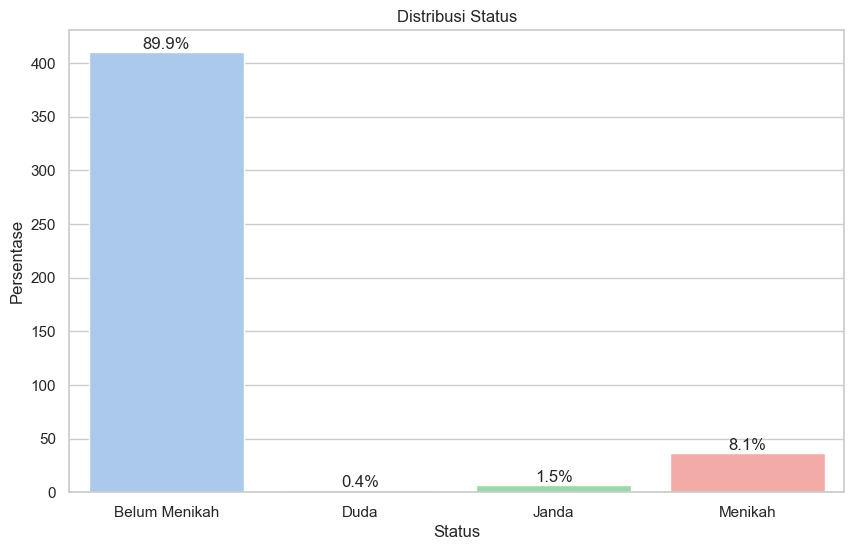

In [253]:
# d. Status  
plt.figure(figsize=(10, 6))  
ax = sns.countplot(data=dataynb[dataynb['status'] != 'Undefined'], x='status', palette='pastel')  
plt.title('Distribusi Status')  
plt.xlabel('Status')  
plt.ylabel('Persentase')  
total = len(dataynb[dataynb['status'] != 'Undefined'])  
for p in ax.patches:  
    percentage = f'{100 * p.get_height() / total:.1f}%'  
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')  
plt.show()  

C:\Users\Vrooh\AppData\Local\Temp\ipykernel_13204\1364168369.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dataynb[dataynb['rentang_usia'] != 'Undefined'], x='rentang_usia', palette='pastel')


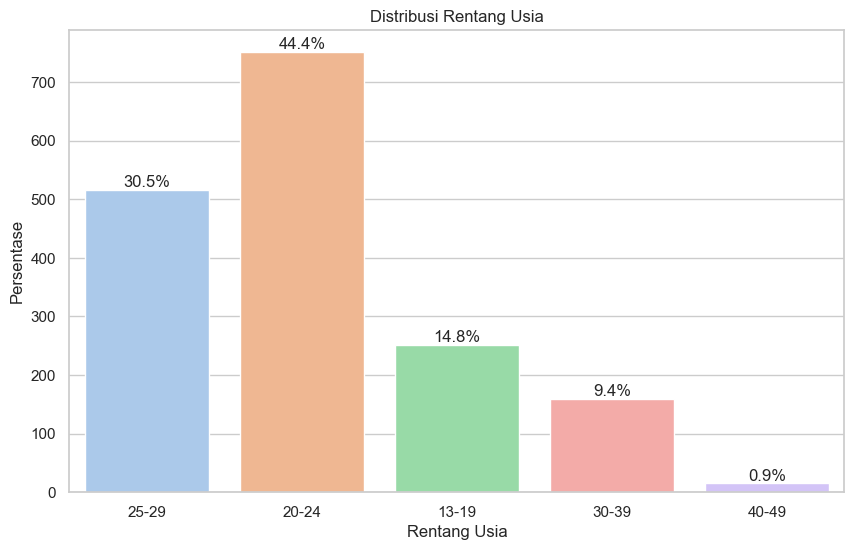

In [254]:
# e. Rentang Usia  
plt.figure(figsize=(10, 6))  
ax = sns.countplot(data=dataynb[dataynb['rentang_usia'] != 'Undefined'], x='rentang_usia', palette='pastel')  
plt.title('Distribusi Rentang Usia')  
plt.xlabel('Rentang Usia')  
plt.ylabel('Persentase')  
total = len(dataynb[dataynb['rentang_usia'] != 'Undefined'])  
for p in ax.patches:  
    percentage = f'{100 * p.get_height() / total:.1f}%'  
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')  
plt.show() 

C:\Users\Vrooh\AppData\Local\Temp\ipykernel_13204\2491822473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dataynb[dataynb['pendidikan_terakhir'] != 'Other'], x='pendidikan_terakhir', palette='pastel')


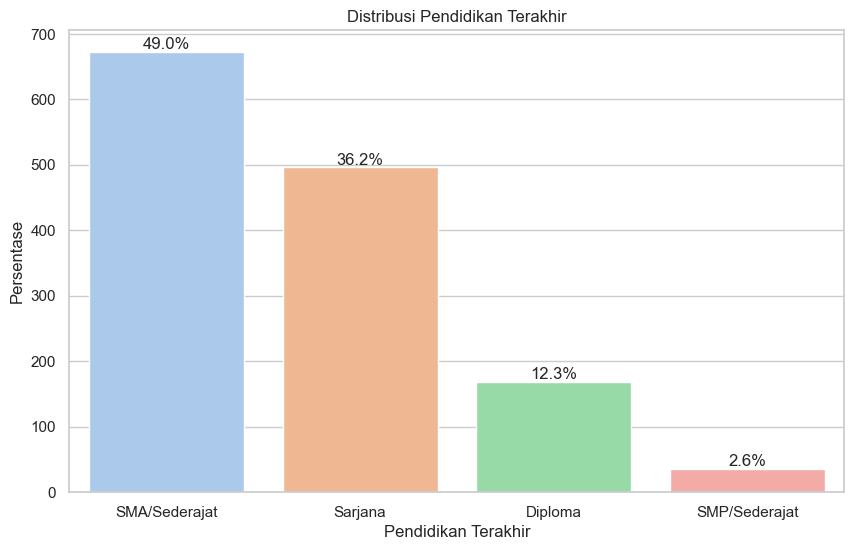

In [255]:
# f. Pendidikan Terakhir  
plt.figure(figsize=(10, 6))  
ax = sns.countplot(data=dataynb[dataynb['pendidikan_terakhir'] != 'Other'], x='pendidikan_terakhir', palette='pastel')  
plt.title('Distribusi Pendidikan Terakhir')  
plt.xlabel('Pendidikan Terakhir')  
plt.ylabel('Persentase')  
total = len(dataynb[dataynb['pendidikan_terakhir'] != 'Other'])  
for p in ax.patches:  
    percentage = f'{100 * p.get_height() / total:.1f}%'  
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')  
plt.show()  

C:\Users\Vrooh\AppData\Local\Temp\ipykernel_13204\1240363545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dataynb[~dataynb['hobby_category'].isin(['undefined', 'Other'])], x='hobby_category', palette='pastel')


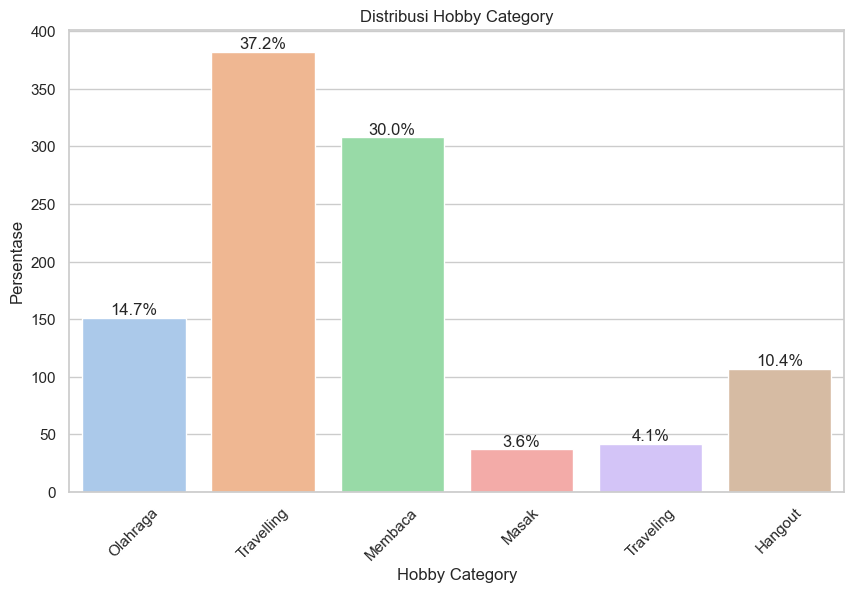

In [256]:
# g. Hobby Category  
plt.figure(figsize=(10, 6))  
ax = sns.countplot(data=dataynb[~dataynb['hobby_category'].isin(['undefined', 'Other'])], x='hobby_category', palette='pastel')  
plt.title('Distribusi Hobby Category')  
plt.xlabel('Hobby Category')  
plt.ylabel('Persentase')  
total = len(dataynb[~dataynb['hobby_category'].isin(['undefined', 'Other'])])  
for p in ax.patches:  
    percentage = f'{100 * p.get_height() / total:.1f}%'  
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')  
plt.xticks(rotation=45)  
plt.show() 

C:\Users\Vrooh\AppData\Local\Temp\ipykernel_13204\2714577369.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dataynb[dataynb['timestamp_interval'] != 'undefined'], x='timestamp_interval', palette='pastel')


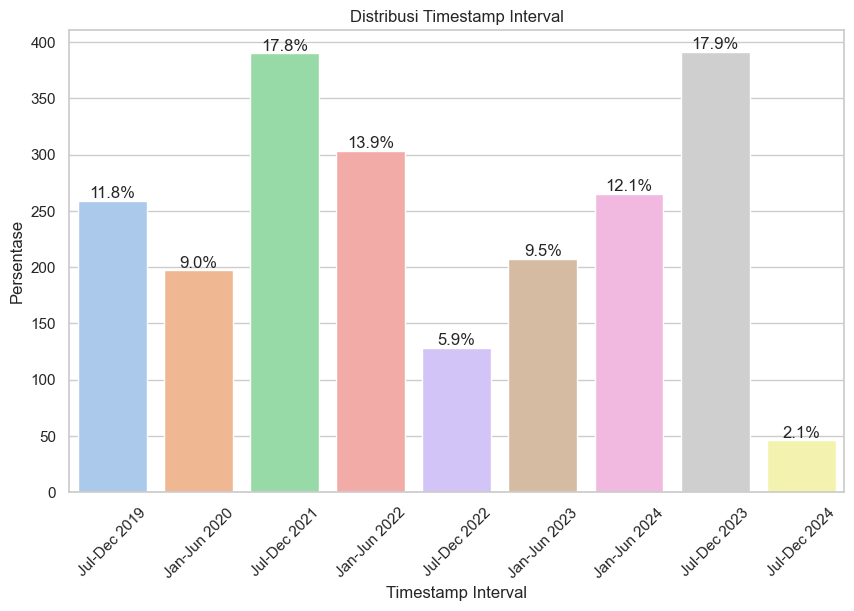

In [260]:
# h. Distribusi berdasarkan Timestamp Interval  
plt.figure(figsize=(10, 6))  
ax = sns.countplot(data=dataynb[dataynb['timestamp_interval'] != 'undefined'], x='timestamp_interval', palette='pastel')  
plt.title('Distribusi Timestamp Interval')  
plt.xlabel('Timestamp Interval')  
plt.ylabel('Persentase')  
total = len(dataynb[dataynb['timestamp_interval'] != 'undefined'])  
for p in ax.patches:  
    percentage = f'{100 * p.get_height() / total:.1f}%'  
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')  
plt.xticks(rotation=45)  
plt.show()  

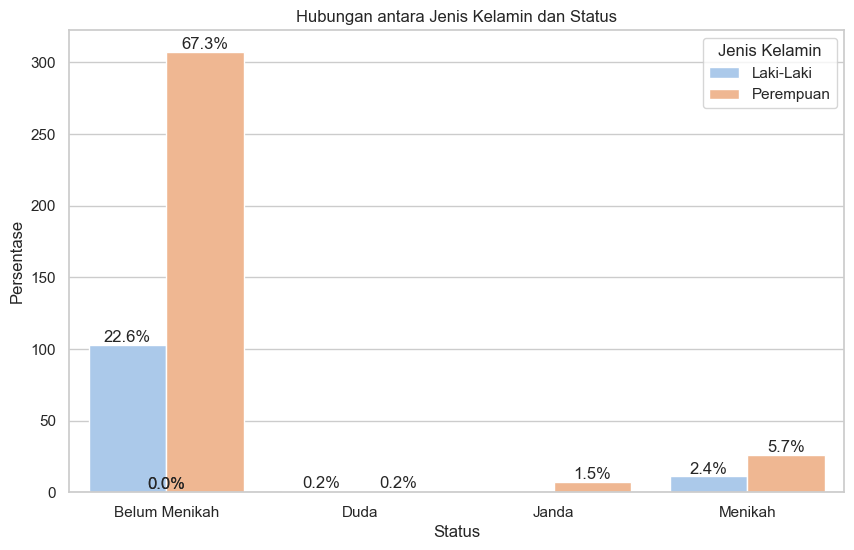

In [257]:
# a. Hubungan antara Jenis Kelamin dan Status  
plt.figure(figsize=(10, 6))  
ax = sns.countplot(data=dataynb[~dataynb['status'].isin(['Undefined', 'Other'])], x='status', hue='jenis_kelamin', palette='pastel')  
plt.title('Hubungan antara Jenis Kelamin dan Status')  
plt.xlabel('Status')  
plt.ylabel('Persentase')  
total = len(dataynb[~dataynb['status'].isin(['Undefined', 'Other'])])  
for p in ax.patches:  
    percentage = f'{100 * p.get_height() / total:.1f}%'  
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')  
plt.legend(title='Jenis Kelamin')  
plt.show()  

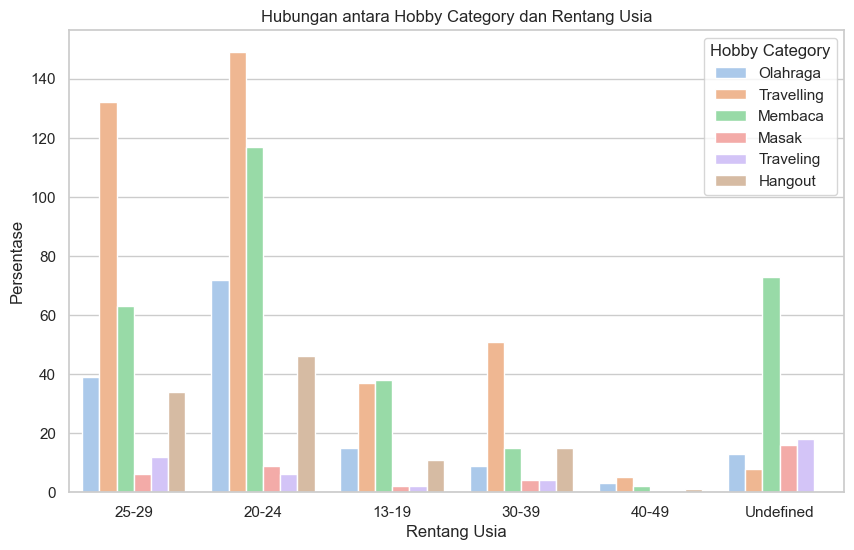

In [258]:
plt.figure(figsize=(10, 6))  
ax = sns.countplot(data=dataynb[~dataynb['hobby_category'].isin(['Undefined', 'Other'])], x='rentang_usia', hue='hobby_category', palette='pastel')  
plt.title('Hubungan antara Hobby Category dan Rentang Usia')  
plt.xlabel('Rentang Usia')  
plt.ylabel('Persentase')  
total = len(dataynb[~dataynb['hobby_category'].isin(['Undefined', 'Other'])])  
# for p in ax.patches:  
#     percentage = f'{100 * p.get_height() / total:.1f}%'  
#     ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')  
plt.legend(title='Hobby Category')  
plt.show()

## Conclusion

In [259]:
dataynb.to_csv("dashboard/main_data.csv", index=False)